In [1]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
base_path = '/content/gdrive/MyDrive/Final_Project_Datasets/F1_Data'

Mounted at /content/gdrive


In [3]:
base_path = '/content/gdrive/MyDrive/Final_Project_Datasets/F1_Data'
filelist = [file for file in os.listdir(base_path) if file.endswith('.csv')]
for file in filelist:
    print(file)
    exec("%s = pd.read_csv('%s/%s')" % (file.split('.')[0], base_path, file))

circuits.csv
seasons.csv
status.csv
constructor_standings.csv
pit_stops.csv
results.csv
drivers.csv
constructor_results.csv
constructors.csv
driver_standings.csv
qualifying.csv
races.csv
sprint_results.csv
lap_times.csv
weather_data_per_race.csv


In [4]:
i= 0
for i in globals().keys():
  if str(type(globals()[i])) == "<class 'pandas.core.frame.DataFrame'>":
    print(i)
    print(globals()[i].columns)

circuits
Index(['circuitId', 'circuitRef', 'name', 'location', 'country', 'lat', 'lng',
       'alt', 'url'],
      dtype='object')
seasons
Index(['year', 'url'], dtype='object')
status
Index(['statusId', 'status'], dtype='object')
constructor_standings
Index(['constructorStandingsId', 'raceId', 'constructorId', 'points',
       'position', 'positionText', 'wins'],
      dtype='object')
pit_stops
Index(['raceId', 'driverId', 'stop', 'lap', 'time', 'duration',
       'milliseconds'],
      dtype='object')
results
Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')
drivers
Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')
constructor_results
Index(['constructorResultsId', 'raceId', 'co

In [5]:
# !pip install selenium

In [ ]:
#Merging all the datasets
# weather_df = pd.merge(races, circuits[['circuitId','country','lat','lng','alt']], how = 'left', on = 'circuitId')
# weather_df['time'] = weather_df['time'].replace('\\N', np.nan)
# weather_df['time'] = pd.to_datetime(weather_df['time'], errors='coerce')

# # Fill NaNs within each group with the minimum time
# weather_df['time'] = weather_df.groupby('name')['time'].transform(lambda x: x.fillna(x.min()))

# # Extract the time component
# weather_df['time'] = weather_df['time'].dt.time.fillna('00:00:00')

In [ ]:
# from datetime import datetime

# weather_df['unix_timestamp'] = weather_df['date'] + ' ' + weather_df['time'].astype(str)
# weather_df['unix_timestamp']  = pd.to_datetime(weather_df['unix_timestamp'])

In [ ]:
#To get weather data.. One time execution
# !pip install meteostat

# from meteostat import Point
# from meteostat import Stations, Hourly


In [ ]:
#Function to get the weather based on latitude, longitude and altitude
# def get_weather_data(lat,lng,alt,time_stamp):
#   try:
#     if str(alt).isdigit():
#       return Hourly(Point(float(lat), float(lng), float(alt)),
#                     time_stamp,
#                     time_stamp).fetch().values[0]
#     else:
#       return Hourly(Point(float(lat), float(lng)),
#                     time_stamp,
#                     time_stamp).fetch().values[0]
#   except IndexError:
#     return [np.nan] * 11


In [ ]:
#No need to run this part again since I have already extracted the data
#Therefore im commenting out for now

# weather_list = []
# for i in range(weather_df.shape[0]):

#   weather_list.append(get_weather_data(weather_df.iloc[i]['lat'],
#                    weather_df.iloc[i]['lng'],
#                    weather_df.iloc[i]['alt'],
#                    weather_df.iloc[i]['unix_timestamp']))


# weather_data.columns = ['temp', 'dwpt', 'rhum', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun', 'coco']
# weather_data = pd.DataFrame(data = weather_list, columns =  ['temp', 'dwpt', 'rhum', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun', 'coco'])
# # weather_df
# weather_df = pd.concat(objs = [weather_df,weather_data], axis = 1 )
# weather_df.to_csv(base_path + '/weather_data_per_race.csv',index= False)


In [11]:
# Joining necessary tables
merged = results.merge(races[['raceId', 'year', 'circuitId']], on='raceId', how='left')
merged = merged.merge(circuits[['circuitId', 'alt']], on='circuitId', how='left')
merged = merged.merge(drivers[['driverId', 'dob']], on='driverId', how='left')
merged = merged.merge(constructors[['constructorId', 'nationality']], on='constructorId', how='left')
merged = merged.merge(qualifying[['raceId', 'driverId', 'constructorId', 'q1', 'q2', 'q3']], on=['raceId', 'driverId', 'constructorId'], how='left')
merged = merged.merge(status[['statusId', 'status']], on='statusId', how='left')

merged.head()


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,statusId,year,circuitId,alt,dob,nationality,q1,q2,q3,status
0,1,18,1,1,22,1,1,1,1,10.0,...,1,2008,1,10,1985-01-07,British,1:26.572,1:25.187,1:26.714,Finished
1,2,18,2,2,3,5,2,2,2,8.0,...,1,2008,1,10,1977-05-10,German,1:25.960,1:25.518,1:27.236,Finished
2,3,18,3,3,7,7,3,3,3,6.0,...,1,2008,1,10,1985-06-27,British,1:26.295,1:26.059,1:28.687,Finished
3,4,18,4,4,5,11,4,4,4,5.0,...,1,2008,1,10,1981-07-29,French,1:26.907,1:26.188,\N,Finished
4,5,18,5,1,23,3,5,5,5,4.0,...,1,2008,1,10,1981-10-19,British,1:25.664,1:25.452,1:27.079,Finished


In [12]:
# Assuming the dataframe containing race results is named 'results_df'

# Define the categories
finished_positional = ['Finished'] + [f'+{i} Laps' for i in range(1, 50)]
technical_failures = ['Engine', 'Gearbox', 'Transmission', 'Clutch', 'Hydraulics', 'Electrical', 'Radiator', 'Suspension', 'Brakes',
                      'Differential', 'Overheating', 'Mechanical', 'Tyre', 'Driveshaft', 'Fuel pressure', 'Front wing',
                      'Water pressure', 'Wheel', 'Throttle', 'Steering', 'Technical', 'Electronics', 'Heat shield fire',
                      'Exhaust', 'Oil leak', 'Wheel rim', 'Water leak', 'Fuel pump', 'Oil pressure', 'Engine fire',
                      'Engine misfire', 'Tyre puncture', 'Out of fuel', 'Wheel nut', 'Pneumatics', 'Rear wing', 'Wheel bearing',
                      'Fuel system', 'Oil line', 'Battery', 'Stalled', 'Halfshaft', 'Crankshaft', 'Alternator', 'Oil pump',
                      'Fuel leak', 'Injection', 'Distributor', 'Turbo', 'CV joint', 'Water pump', 'Spark plugs', 'Fuel pipe',
                      'Oil pipe', 'Axle', 'Water pipe', 'Magneto', 'Supercharger', 'Power Unit', 'ERS', 'Brake duct', 'Cooling system']
accidents_collisions = ['Accident', 'Collision', 'Spun off', 'Collision damage']
disqualifications_regulations = ['Disqualified', '107% Rule', 'Did not qualify', 'Did not prequalify', 'Underweight', 'Excluded']
external_factors = ['Debris', 'Fire', 'Safety concerns', 'Safety', 'Safety belt', 'Physical', 'Injured', 'Injury', 'Fatal accident',
                    'Eye injury', 'Driver unwell', 'Illness']
other = ['Retired', 'Driver Seat', 'Puncture', 'Refuelling', 'Withdrew', 'Handling', 'Fire', 'Vibrations', 'Drivetrain', 'Ignition',
         'Chassis', 'Seat', 'Damage']
unknown_general = ['Retired', 'Not classified']

# Map the statuses to their categories
def categorize_status(status):
    if status in finished_positional:
        return 'Finished/Positional'
    if status in technical_failures:
        return 'Technical Failures'
    if status in accidents_collisions:
        return 'Accidents/Collisions'
    if status in disqualifications_regulations:
        return 'Disqualifications/Regulations'
    if status in external_factors:
        return 'External Factors'
    if status in other:
        return 'Other'
    if status in unknown_general:
        return 'Unknown/General'
    return 'Miscellaneous' # For statuses not categorized above

# Apply the categorization to the dataframe
merged['status_category'] = merged['status'].apply(categorize_status)

In [13]:
merged.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'circuitId', 'alt', 'dob',
       'nationality', 'q1', 'q2', 'q3', 'status', 'status_category'],
      dtype='object')

In [14]:
# Create target variable

#Modifying the position variable since it has '/N'

merged['position'] = merged['position'].replace('\\N', np.nan)

#For those which are nan treating it with higher position values
merged['position'] = merged['position'].fillna(25).astype(int)

merged['podium'] = merged['position'].apply(lambda x: 1 if x <= 3 else 0)

# Assuming 'positionOrder' is a column where values 1, 2, or 3 indicate podium finishes
merged['past_podiums'] = merged.groupby('driverId')['positionOrder'].transform(lambda x: (x <= 3).cumsum() - (x <= 3))


In [16]:
# Calculate rolling average for driver's position over the last 2,5,7,10 races
merged['driver_avg_position_last_2'] = merged.groupby('driverId')['position'].transform(lambda x: x.rolling(2, min_periods=1).mean().shift(1))
merged['driver_avg_position_last_5'] = merged.groupby('driverId')['position'].transform(lambda x: x.rolling(5, min_periods=1).mean().shift(1))
merged['driver_avg_position_last_7'] = merged.groupby('driverId')['position'].transform(lambda x: x.rolling(7, min_periods=1).mean().shift(1))
merged['driver_avg_position_last_10'] = merged.groupby('driverId')['position'].transform(lambda x: x.rolling(10, min_periods=1).mean().shift(1))


# Do similarly for constructor
merged['constructor_avg_position_last_2'] = merged.groupby('constructorId')['position'].transform(lambda x: x.rolling(2, min_periods=1).mean().shift(1))
merged['constructor_avg_position_last_5'] = merged.groupby('constructorId')['position'].transform(lambda x: x.rolling(5, min_periods=1).mean().shift(1))
merged['constructor_avg_position_last_7'] = merged.groupby('constructorId')['position'].transform(lambda x: x.rolling(7, min_periods=1).mean().shift(1))
merged['constructor_avg_position_last_10'] = merged.groupby('constructorId')['position'].transform(lambda x: x.rolling(10, min_periods=1).mean().shift(1))

In [17]:

# Filling missing qualifying times with a large value (indicative of not participating or not setting a time)

for i in merged.columns:
  merged[i] = merged[i].replace('\\N', np.nan)

merged[['q1', 'q2', 'q3']] = merged[['q1', 'q2', 'q3']].fillna('99:99.999')

# Convert time columns to milliseconds for easier analysis
# Convert time columns to milliseconds
def time_to_milliseconds(t):
    if isinstance(t, str) and ':' in t:  # Check if the format is as expected
        minutes, seconds = map(float, t.split(':'))
        return minutes * 60000 + seconds * 1000
    return t  # Return original value if format is not as expected

for col in ['q1', 'q2', 'q3']:
    merged[col] = merged[col].apply(time_to_milliseconds)


for col in ['fastestLapTime']:
    merged[col] = merged[col].apply(time_to_milliseconds)

# Convert speeds to float
merged['fastestLapSpeed'] = merged['fastestLapSpeed'].astype(float)
merged['alt'] = merged['alt'].astype(float)

#Just 6 missing values so replacing with mode
merged['number'].fillna(merged['number'].mode()[0], inplace=True)

# Filling with 0 for demonstration purposes (choose what makes sense for your analysis)
cols_to_fill_zero =['time' ,'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed']
for col in cols_to_fill_zero:
    merged[col].fillna(0, inplace=True)

#Replacing altitude with the mean of altidtude
merged['alt'].fillna(merged['alt'].mean(), inplace=True)



In [18]:
merged['status_numeric'] = merged['status'].apply(lambda x: 1 if x == "Finished" else 0)

N = 5  # The number of games you want to consider

for category in merged['status_category'].unique():
    # Create a binary column for each category
    merged[f'is_{category}'] = merged['status_category'].apply(lambda x: 1 if x == category else 0)

    merged[f'historical_{category.lower().replace("/", "_").replace(" ", "_")}_5_games'] = (
        merged.groupby('driverId')[f'is_{category}']
        .apply(lambda x: x.shift(1).rolling(window=N, min_periods=1).sum()) # Shift by 1 to not include current race
    )

    # Fill NaN values with 0
    merged[f'historical_{category.lower().replace("/", "_").replace(" ", "_")}_5_games'].fillna(0, inplace=True)

N = 2  # The number of games you want to consider

for category in merged['status_category'].unique():
    # Create a binary column for each category

    merged[f'historical_{category.lower().replace("/", "_").replace(" ", "_")}_2_games'] = (
        merged.groupby('driverId')[f'is_{category}']
        .apply(lambda x: x.shift(1).rolling(window=N, min_periods=1).sum()) # Shift by 1 to not include current race
    )

    # Fill NaN values with 0
    merged[f'historical_{category.lower().replace("/", "_").replace(" ", "_")}_2_games'].fillna(0, inplace=True)



In [20]:
merged.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'circuitId', 'alt', 'dob',
       'nationality', 'q1', 'q2', 'q3', 'status', 'status_category', 'podium',
       'past_podiums', 'driver_avg_position_last_2',
       'driver_avg_position_last_5', 'driver_avg_position_last_7',
       'driver_avg_position_last_10', 'constructor_avg_position_last_2',
       'constructor_avg_position_last_5', 'constructor_avg_position_last_7',
       'constructor_avg_position_last_10', 'status_numeric',
       'is_Finished/Positional', 'historical_finished_positional_5_games',
       'is_Miscellaneous', 'historical_miscellaneous_5_games',
       'is_Technical Failures', 'historical_technical_failures_5_games',
       'is_Accidents/Collisions', 'historical_accidents_collisions_5_games',
       'is_D

In [21]:
def compute_reliability(series):
    return sum(series) / len(series)


merged['historical_reliability_5_games'] = merged.groupby('driverId')['status_numeric'].transform(lambda x: x.rolling(window=5, min_periods=1).apply(compute_reliability).shift(1))
merged['historical_reliability_10_games'] = merged.groupby('driverId')['status_numeric'].transform(lambda x: x.rolling(window=10, min_periods=1).apply(compute_reliability).shift(1))
merged['historical_reliability_15_games'] = merged.groupby('driverId')['status_numeric'].transform(lambda x: x.rolling(window=15, min_periods=1).apply(compute_reliability).shift(1))

# 2. Flag for issue in the last race
merged['had_issue_last_race'] = merged.groupby('driverId')['status_numeric'].shift().apply(lambda x: 0 if x == 1 else 1)

# Fill missing values with the average of available races for each driver or constructor
merged['driver_avg_position_last_2'].fillna(merged['driver_avg_position_last_2'].mean(), inplace=True)
merged['driver_avg_position_last_5'].fillna(merged['driver_avg_position_last_5'].mean(), inplace=True)
merged['driver_avg_position_last_7'].fillna(merged['driver_avg_position_last_7'].mean(), inplace=True)
merged['driver_avg_position_last_10'].fillna(merged['driver_avg_position_last_10'].mean(), inplace=True)
merged['constructor_avg_position_last_2'].fillna(merged['constructor_avg_position_last_2'].mean(), inplace=True)
merged['constructor_avg_position_last_5'].fillna(merged['constructor_avg_position_last_5'].mean(), inplace=True)
merged['constructor_avg_position_last_7'].fillna(merged['constructor_avg_position_last_7'].mean(), inplace=True)
merged['constructor_avg_position_last_10'].fillna(merged['constructor_avg_position_last_10'].mean(), inplace=True)
merged['historical_reliability_5_games'].fillna(merged['historical_reliability_5_games'].mean(), inplace=True)
merged['historical_reliability_10_games'].fillna(merged['historical_reliability_10_games'].mean(), inplace=True)
merged['historical_reliability_15_games'].fillna(merged['historical_reliability_15_games'].mean(), inplace=True)


def compute_consecutive_finishes(series):
    # Count consecutive races finished
    consecutive = series.groupby((series != 1).cumsum()).cumcount().where(series == 1, 0)
    # Reset the count when there's a non-finish
    consecutive = consecutive.where((consecutive == 0) | (series == 1), 0)
    return consecutive

merged['consecutive_finishes'] = merged.groupby('driverId')['status_numeric'].shift(1).transform(compute_consecutive_finishes).fillna(0).astype(int)


# Convert 'dob' column to datetime format if it isn't already
merged['dob'] = pd.to_datetime(merged['dob'])

# Extract the year from 'dob'
merged['year_of_birth'] = merged['dob'].dt.year

# Calculate age during the race
merged['age_at_race'] = merged['year'] - merged['year_of_birth']

# Drop the 'year_of_birth' column as it's no longer needed
merged.drop(columns=['year_of_birth'], inplace=True)

from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'nationality' column
merged['nationality_encoded'] = label_encoder.fit_transform(merged['nationality'])




In [22]:
merged['Q_mean'] = merged[['q1', 'q2', 'q3']].mean(axis=1)
merged['Q_best'] = merged[['q1', 'q2', 'q3']].min(axis=1)
merged['Q_worst'] = merged[['q1', 'q2', 'q3']].max(axis=1)


columns_to_drop = [
    'circuitRef', 'name', 'location', 'country', 'lat', 'lng', 'url',
    'positionText', 'number', 'time', 'milliseconds', 'fastestLap', 'rank',
    'fastestLapTime', 'fastestLapSpeed', 'positionOrder', 'position', 'points', 'laps','resultId',
    'status', 'statusId','status_numeric','status_category','dob','nationality'
] + [i for i in merged.columns if 'is_' in i]

merged = merged.drop(columns=columns_to_drop,errors='ignore')

print(merged.columns)


Index(['raceId', 'driverId', 'constructorId', 'grid', 'year', 'circuitId',
       'alt', 'q1', 'q2', 'q3', 'podium', 'past_podiums',
       'driver_avg_position_last_2', 'driver_avg_position_last_5',
       'driver_avg_position_last_7', 'driver_avg_position_last_10',
       'constructor_avg_position_last_2', 'constructor_avg_position_last_5',
       'constructor_avg_position_last_7', 'constructor_avg_position_last_10',
       'historical_finished_positional_5_games',
       'historical_miscellaneous_5_games',
       'historical_technical_failures_5_games',
       'historical_accidents_collisions_5_games',
       'historical_disqualifications_regulations_5_games',
       'historical_other_5_games', 'historical_unknown_general_5_games',
       'historical_external_factors_5_games',
       'historical_finished_positional_2_games',
       'historical_miscellaneous_2_games',
       'historical_technical_failures_2_games',
       'historical_accidents_collisions_2_games',
       'historical_

In [59]:
#Removing columns that directly affect the podium finish
# features_to_drop = ['position', 'positionOrder','positionText', 'points', 'time']
# merged = merged.drop(columns=features_to_drop)

In [23]:
merged.isna().sum()

raceId                                              0
driverId                                            0
constructorId                                       0
grid                                                0
year                                                0
circuitId                                           0
alt                                                 0
q1                                                  0
q2                                                  0
q3                                                  0
podium                                              0
past_podiums                                        0
driver_avg_position_last_2                          0
driver_avg_position_last_5                          0
driver_avg_position_last_7                          0
driver_avg_position_last_10                         0
constructor_avg_position_last_2                     0
constructor_avg_position_last_5                     0
constructor_avg_position_las

In [24]:
from sklearn.model_selection import train_test_split

# Splitting data into training and test sets
X = merged.drop(columns=['podium'])  # Your features here
y = merged['podium']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize model
clf = RandomForestClassifier(class_weight='balanced',n_estimators=100, max_depth=5, random_state=42)

# Train model
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.80      0.88      4571
           1       0.38      0.85      0.52       661

    accuracy                           0.81      5232
   macro avg       0.68      0.82      0.70      5232
weighted avg       0.90      0.81      0.83      5232



In [27]:
feature_importances = clf.feature_importances_
feature_names = X.columns

# Sort features based on importance
sorted_idx = np.argsort(feature_importances)[::-1]


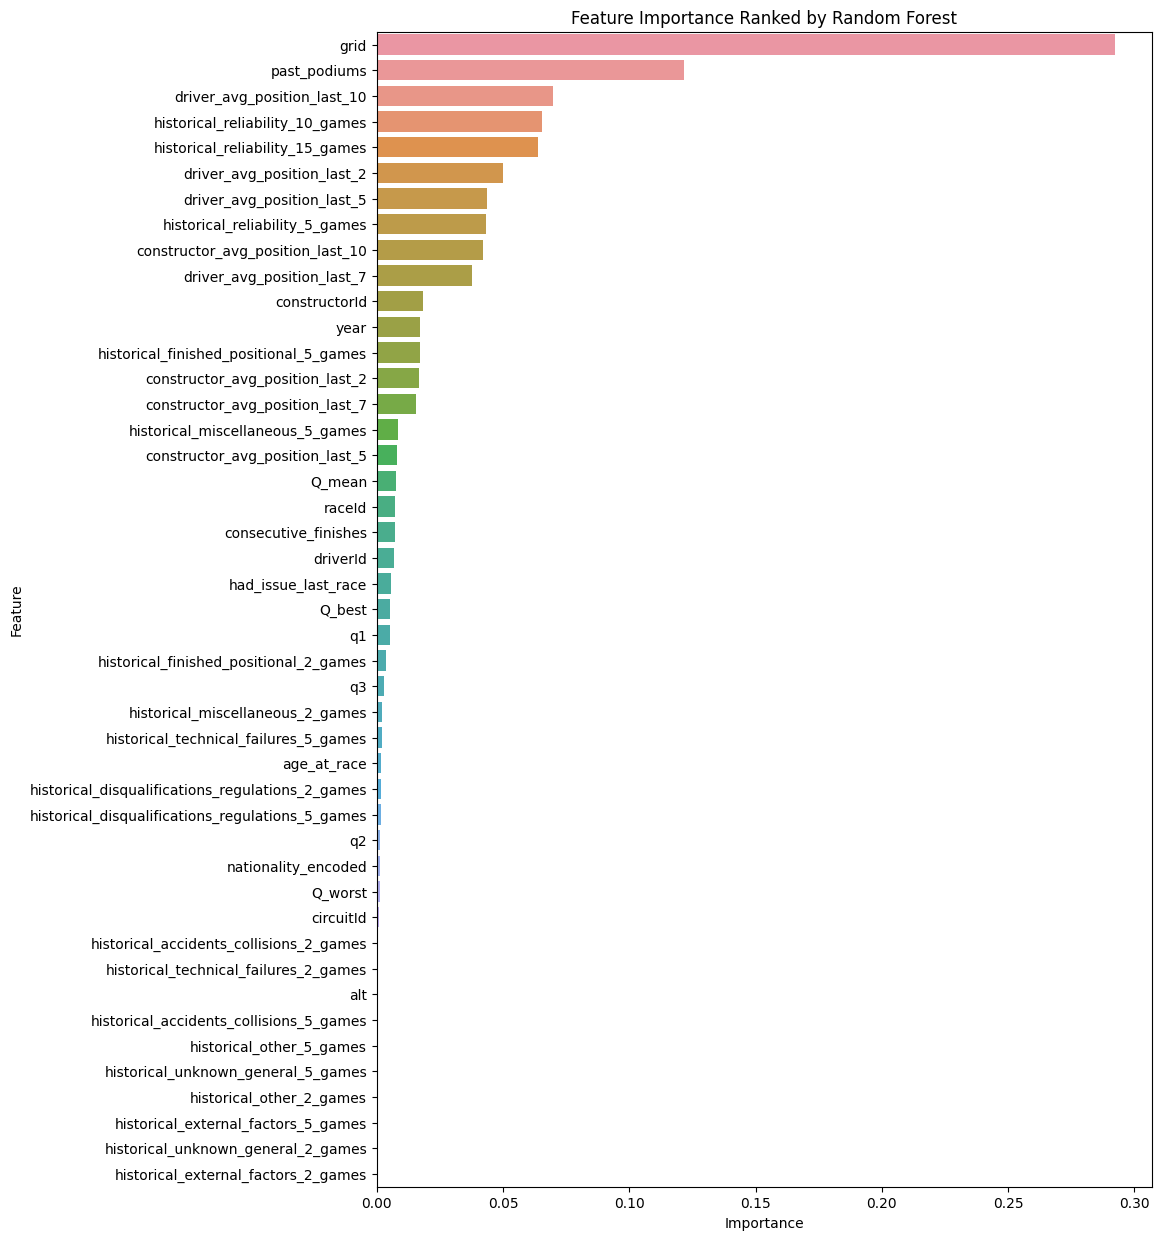

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 15))
sns.barplot(x=feature_importances[sorted_idx], y=feature_names[sorted_idx])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Ranked by Random Forest")
plt.show()


In [29]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.93      0.96      0.94      4571
           1       0.64      0.47      0.54       661

    accuracy                           0.90      5232
   macro avg       0.78      0.72      0.74      5232
weighted avg       0.89      0.90      0.89      5232



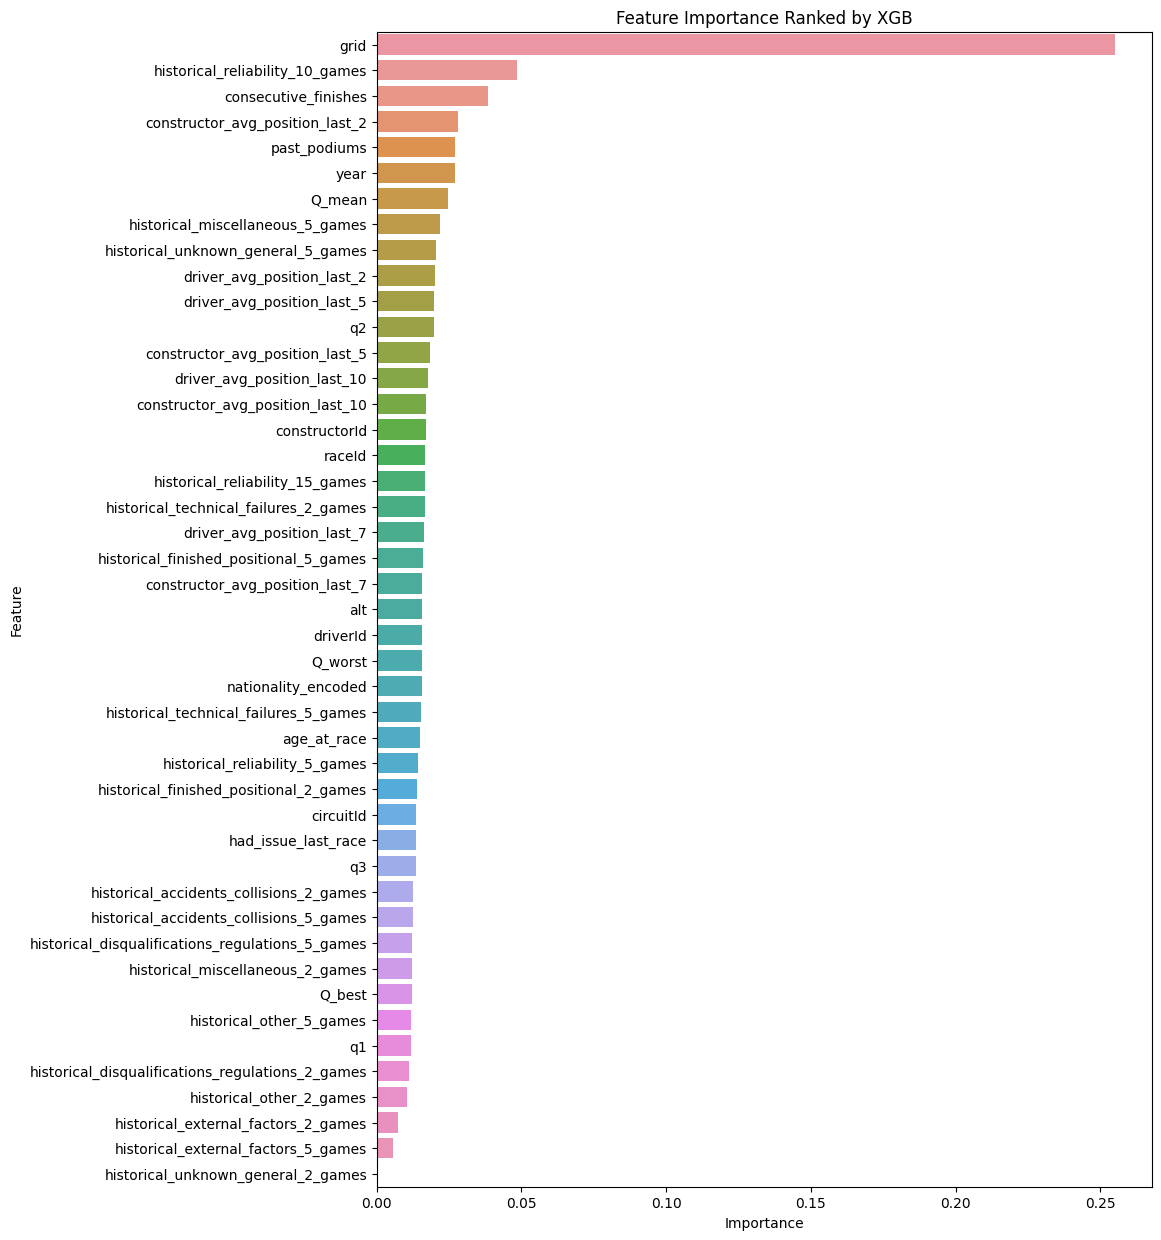

In [30]:
feature_importances = xgb.feature_importances_
feature_names = X.columns

# Sort features based on importance
sorted_idx = np.argsort(feature_importances)[::-1]


plt.figure(figsize=(10, 15))
sns.barplot(x=feature_importances[sorted_idx], y=feature_names[sorted_idx])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Ranked by XGB")
plt.show()


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # sigmoid for binary classification


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[metrics.AUC(name='auc'),
                       metrics.Precision(name='precision'),
                       metrics.Recall(name='recall')])

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/50
2093/2093 [==============================] - 16s 5ms/step - loss: 0.2702 - auc: 0.8681 - precision: 0.5668 - recall: 0.2325 - val_loss: 0.2473 - val_auc: 0.8961 - val_precision: 0.6361 - val_recall: 0.3570
Epoch 2/50
2093/2093 [==============================] - 9s 4ms/step - loss: 0.2464 - auc: 0.8953 - precision: 0.6030 - recall: 0.3773 - val_loss: 0.2421 - val_auc: 0.8996 - val_precision: 0.6368 - val_recall: 0.3661
Epoch 3/50
2093/2093 [==============================] - 9s 4ms/step - loss: 0.2415 - auc: 0.9002 - precision: 0.6251 - recall: 0.3826 - val_loss: 0.2396 - val_auc: 0.9030 - val_precision: 0.6063 - val_recall: 0.5219
Epoch 4/50
2093/2093 [==============================] - 9s 4ms/step - loss: 0.2379 - auc: 0.9036 - precision: 0.6367 - recall: 0.4102 - val_loss: 0.2390 - val_auc: 0.9021 - val_precision: 0.7006 - val_recall: 0.3646
Epoch 5/50
2093/2093 [==============================] - 10s 5ms/step - loss: 0.2353 - auc: 0.9058 - precision: 0.6388 - recall: 0.4166 

In [33]:
loss, auc, precision, recall = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test AUC: {auc:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")


Test AUC: 0.8761
Test Precision: 0.5864
Test Recall: 0.4160


In [34]:
from sklearn.metrics import classification_report

y_pred_probs = model.predict(X_test_scaled)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_probs]

print(classification_report(y_test, y_pred))


164/164 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      4571
           1       0.59      0.42      0.49       661

    accuracy                           0.89      5232
   macro avg       0.75      0.69      0.71      5232
weighted avg       0.88      0.89      0.88      5232



In [47]:
weather_data = weather_data_per_race[['raceId','temp', 'dwpt', 'rhum', 'prcp',
       'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun', 'coco']]

Adding weather related variables to see if that makes an impact

In [61]:
merged_w_weather = merged.merge(weather_data[['raceId','temp', 'dwpt', 'rhum', 'prcp',
       'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun', 'coco']], how = 'left', on = 'raceId')

#Modifying the values based on these circuits and keeping median for that circuit
for i in ['temp', 'dwpt', 'rhum', 'prcp',
       'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun', 'coco']:

  circuit_temp_medians = merged_w_weather.groupby('circuitId')[i].transform('median')
  merged_w_weather[i].fillna(circuit_temp_medians, inplace=True)

In [62]:
#90% of the data is missing for these columns
merged_w_weather = merged_w_weather.drop(columns =  ['snow', 'wpgt', 'tsun'])

#Other columns which have missing values are imputed with the median of that
for i in list(merged_w_weather.isna().sum()[merged_w_weather.isna().sum()>0].index):
  merged_w_weather[i] = merged_w_weather[i].fillna(merged_w_weather[i].median())

In [68]:
merged_w_weather.columns

Index(['raceId', 'driverId', 'constructorId', 'grid', 'year', 'circuitId',
       'alt', 'q1', 'q2', 'q3', 'podium', 'past_podiums',
       'driver_avg_position_last_2', 'driver_avg_position_last_5',
       'driver_avg_position_last_7', 'driver_avg_position_last_10',
       'constructor_avg_position_last_2', 'constructor_avg_position_last_5',
       'constructor_avg_position_last_7', 'constructor_avg_position_last_10',
       'historical_finished_positional_5_games',
       'historical_miscellaneous_5_games',
       'historical_technical_failures_5_games',
       'historical_accidents_collisions_5_games',
       'historical_disqualifications_regulations_5_games',
       'historical_other_5_games', 'historical_unknown_general_5_games',
       'historical_external_factors_5_games',
       'historical_finished_positional_2_games',
       'historical_miscellaneous_2_games',
       'historical_technical_failures_2_games',
       'historical_accidents_collisions_2_games',
       'historical_

In [64]:
from sklearn.model_selection import train_test_split

# Splitting data into training and test sets
X = merged_w_weather.drop(columns=['podium'])  # Your features here
y = merged_w_weather['podium']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [65]:
# Initialize model
clf = RandomForestClassifier(class_weight='balanced',n_estimators=100, max_depth=5, random_state=42)

# Train model
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.80      0.88      4571
           1       0.38      0.84      0.52       661

    accuracy                           0.81      5232
   macro avg       0.68      0.82      0.70      5232
weighted avg       0.90      0.81      0.84      5232



In [66]:
feature_importances = clf.feature_importances_
feature_names = X.columns

# Sort features based on importance
sorted_idx = np.argsort(feature_importances)[::-1]


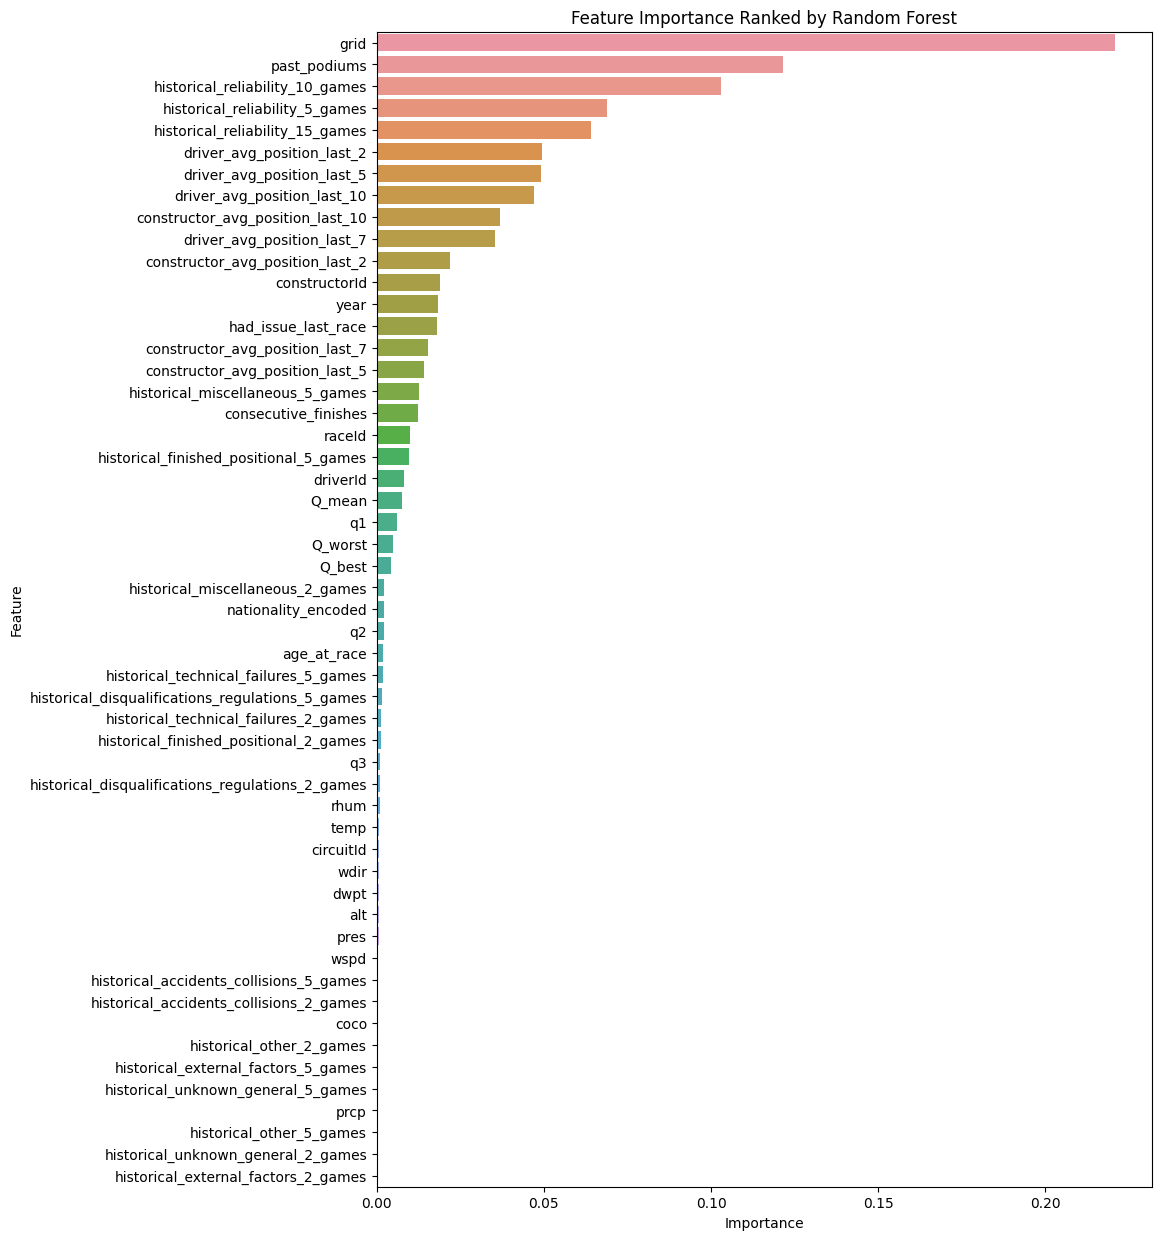

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 15))
sns.barplot(x=feature_importances[sorted_idx], y=feature_names[sorted_idx])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Ranked by Random Forest")
plt.show()


Using SMOTE to handle the imbalance

In [69]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)


# Initialize model
clf = RandomForestClassifier(class_weight='balanced',n_estimators=100, max_depth=5, random_state=42)

# Train model
clf.fit(X_smote, y_smote)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.84      0.89      4571
           1       0.41      0.77      0.53       661

    accuracy                           0.83      5232
   macro avg       0.68      0.81      0.71      5232
weighted avg       0.89      0.83      0.85      5232



In [71]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=sum(y_smote==0) / sum(y_smote==1),
                              eval_metric='logloss', random_state=42)
xgb.fit(X_smote, y_smote)

y_pred_xgb = xgb.predict(X_test)

print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4571
           1       0.61      0.49      0.54       661

    accuracy                           0.90      5232
   macro avg       0.77      0.72      0.74      5232
weighted avg       0.89      0.90      0.89      5232



Cost-sensitive Learning through XGBoost

In [79]:

sample_weights = np.zeros(len(y_train))
sample_weights[y_train == 0] = 1
sample_weights[y_train == 1] = 3

xgb_weighted_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_weighted_model.fit(X_train, y_train, sample_weight=sample_weights)

# Predict on test set
y_pred_weighted = xgb_weighted_model.predict(X_test)

# Evaluate model
print(classification_report(y_test, y_pred_weighted))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4571
           1       0.55      0.63      0.59       661

    accuracy                           0.89      5232
   macro avg       0.75      0.78      0.76      5232
weighted avg       0.90      0.89      0.89      5232



Using Recursive Feature Elimination to select top features and run the model

In [80]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
selector = RFECV(estimator=clf, step=1, cv=5)
selector = selector.fit(X_train, y_train)

selected_features = list(X.columns[selector.support_])

In [81]:
print("Number of features selected by RFECV:", len(selected_features))
print("Selected features:", selected_features)

Number of features selected by RFECV: 13
Selected features: ['raceId', 'grid', 'year', 'past_podiums', 'driver_avg_position_last_2', 'driver_avg_position_last_5', 'driver_avg_position_last_7', 'driver_avg_position_last_10', 'constructor_avg_position_last_2', 'constructor_avg_position_last_5', 'constructor_avg_position_last_7', 'constructor_avg_position_last_10', 'dwpt']


In [82]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_selected, y_train)

# Train the model
clf.fit(X_train_selected, y_train)

# Predict on the test set
y_pred_selected = clf.predict(X_test_selected)

# Evaluate the model's performance
print(classification_report(y_test, y_pred_selected))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      4571
           1       0.66      0.40      0.49       661

    accuracy                           0.90      5232
   macro avg       0.79      0.68      0.72      5232
weighted avg       0.88      0.90      0.89      5232



In [87]:
feature_importances

array([0.06308145, 0.17232186, 0.05436492, 0.07883328, 0.07134603,
       0.0791393 , 0.07677496, 0.08883396, 0.06808661, 0.05917181,
       0.06183611, 0.06943759, 0.05677212])

In [92]:
feature_importances = clf.feature_importances_
feature_names = X.columns

# Sort features based on importance
# sorted_idx = np.argsort(feature_importances)[::-1]


In [96]:
feature_importances

array([0.06308145, 0.17232186, 0.05436492, 0.07883328, 0.07134603,
       0.0791393 , 0.07677496, 0.08883396, 0.06808661, 0.05917181,
       0.06183611, 0.06943759, 0.05677212])

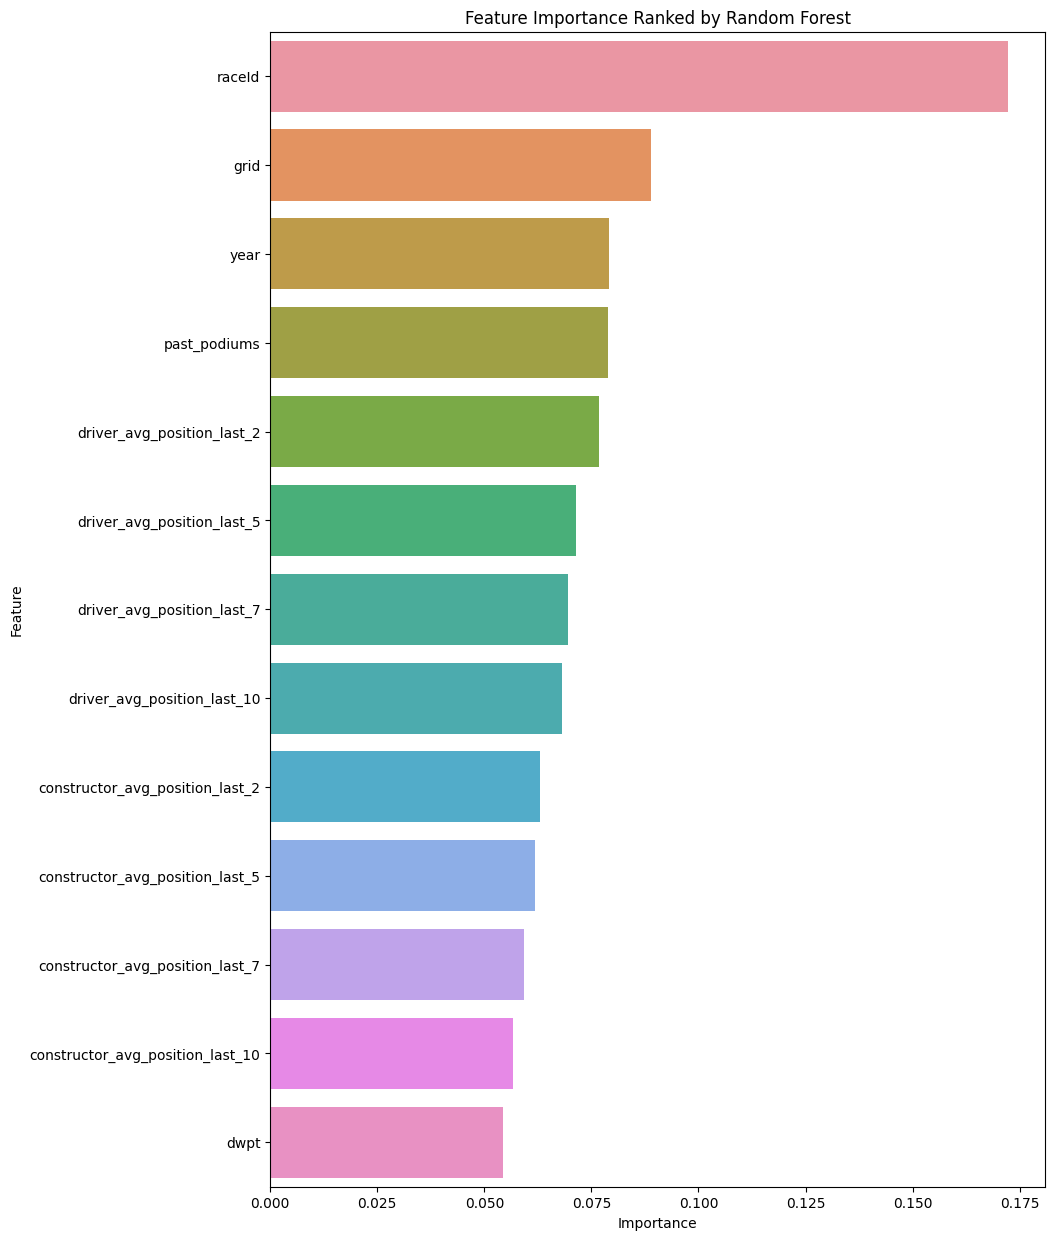

In [97]:
plt.figure(figsize=(10, 15))
sns.barplot(x=feature_importances[sorted_idx], y=selected_features)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Ranked by Random Forest")
plt.show()
